<a href="https://colab.research.google.com/github/Mobodot/Ineuron_DL_assignments/blob/main/keras_tuner_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

## Preparing the dataset

In [ ]:
dataset = pd.read_csv("/content/final.csv")
dataset.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,24.50,0.50,15.50,0.87,26.0,2.74,bending2
1,250,25.00,0.00,13.50,3.64,33.5,2.60,bending2
2,500,26.00,0.71,14.25,3.90,18.5,13.61,bending2
3,750,24.33,0.47,15.67,2.62,25.5,3.64,bending2
4,1000,23.50,0.87,16.25,1.30,23.0,1.22,bending2


In [ ]:
dataset.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'label'],
      dtype='object')

In [ ]:
dataset = dataset.rename({"# Columns: time": "time"}, axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42239 entries, 0 to 42238
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       42239 non-null  int64  
 1   avg_rss12  42239 non-null  float64
 2   var_rss12  42239 non-null  float64
 3   avg_rss13  42239 non-null  float64
 4   var_rss13  42239 non-null  float64
 5   avg_rss23  42239 non-null  float64
 6   var_rss23  42239 non-null  float64
 7   label      42239 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ MB


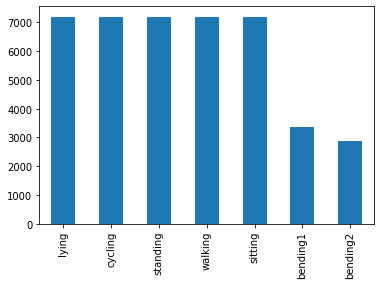

In [ ]:
dataset["label"].value_counts().plot(kind="bar")

In [ ]:
X, y = dataset.iloc[:, :-1], dataset["label"]

In [ ]:
X.describe()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000,42239.000000
mean,59876.097919,38.917264,1.459145,14.278160,1.502241,16.035170,1.620705
std,34641.026167,6.337280,2.047973,5.435483,1.639519,6.736022,1.637070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30000.000000,35.000000,0.400000,11.330000,0.430000,12.000000,0.470000
50%,60000.000000,39.750000,0.500000,15.000000,0.830000,16.000000,1.000000
75%,89875.000000,43.750000,1.790000,18.000000,2.290000,19.250000,2.290000
max,119750.000000,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [ ]:
X.isnull().sum()

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

In [ ]:
y.isnull().sum()

0

In [ ]:
y.unique()

array(['bending2', 'sitting', 'lying', 'cycling', 'standing', 'bending1',
       'walking'], dtype=object)

In [ ]:
le = LabelEncoder()

y = le.fit_transform(y)

### Spliting the data into 3 parts
The dataset was split into 3 parts so that we can have training, validation and testing datasets for out NN.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=43)

In [ ]:
X_train.shape, y_train.shape

((31679, 7), (31679,))

In [ ]:
X_test.shape, y_test.shape

((10560, 7), (10560,))

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state=25,
                                                                    test_size=.1)

In [ ]:
X_test.shape, y_test.shape


((1056, 7), (1056,))

In [ ]:
X_valid.shape, y_valid.shape

((9504, 7), (9504,))

#### Checking to see that the distribution of that dataset has not changed with respect to the target column

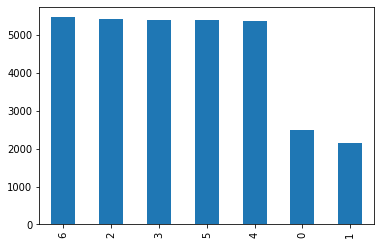

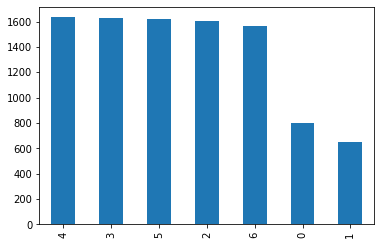

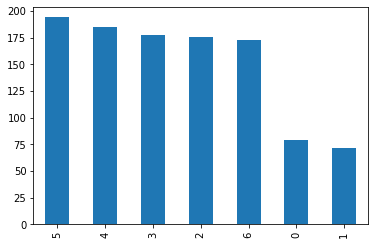

In [ ]:
import matplotlib.pyplot as plt
for i in y_train,y_valid,y_test:
    df = pd.DataFrame(i, columns=["label"])
    df["label"].value_counts().plot(kind="bar")
    plt.show()
    print("\n")

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [ ]:
X_valid

array([[ 1.0078312 ,  0.09546242, -0.46975364, ..., -0.41374791,
        -1.08268381, -0.73041293],
       [ 0.46644593,  0.41021748, -0.46975364, ..., -0.34664081,
        -0.89649962, -0.55996231],
       [-0.49361061,  0.59434919, -0.25573764, ...,  1.09311142,
         0.81639492,  0.40186621],
       ...,
       [ 1.3976286 ,  0.48890625, -0.71295365, ..., -0.48695565,
         0.48126338, -0.48691204],
       [-0.50082908, -0.21929264,  4.98765449, ..., -0.00500469,
         0.18336868,  0.99844339],
       [ 0.22823641,  0.96103884, -0.71295365, ..., -0.65777371,
        -0.59860492, -0.99217638]])

## seting up keras tuner

In [ ]:
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 52.3 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
  model_clf = keras.Sequential()
  model_clf.add(keras.Input(shape=(7,)))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 
  units1 = hp.Int("units1", min_value=25, max_value=512, step=32)
  units2 = hp.Int("units2", min_value=25, max_value=512, step=32)
  units3 = hp.Int("units3", min_value=25, max_value=512, step=32)

  model_clf.add(keras.layers.Dense(units=units1, activation="relu"))
  model_clf.add(keras.layers.Dense(units=units2, activation="relu"))
  model_clf.add(keras.layers.Dense(units=units3, activation="relu"))
  model_clf.add(keras.layers.Dense(7))

  hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

  model_clf.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                                                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                metrics=["accuracy"])
  
  return model_clf

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective="val_accuracy",
                     max_epochs=100,
                     directory="my_dir",
                     factor=3,
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                              patience=10)

In [ ]:
CKPT_path = "model.ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path,
                                                      save_best_only=True)

In [ ]:
tuner.search(X_train, y_train, epochs=50, 
             validation_data=(X_valid, y_valid),
             callbacks=[stop_early,
                        checkpointing_cb])

# get best parameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

Trial 214 Complete [00h 01m 05s]
val_accuracy: 0.808922529220581

Best val_accuracy So Far: 0.8257575631141663
Total elapsed time: 01h 51m 10s

Search: Running Trial #215

Value             |Best Value So Far |Hyperparameter
249               |249               |units1
409               |473               |units2
121               |473               |units3
0.01              |0.001             |learning_rate
12                |34                |tuner/epochs
0                 |12                |tuner/initial_epoch
2                 |4                 |tuner/bracket
0                 |3                 |tuner/round

Epoch 1/12
129/990 [==>...........................] - ETA: 4s - loss: 0.8924 - accuracy: 0.6248

KeyboardInterrupt: ignored

In [ ]:
tuner.get_best_hyperparameters()[0].get("units1")


249

In [ ]:
for p in ["units1", "units2","units3","learning_rate"]:
  print(p, tuner.get_best_hyperparameters()[0].get(p))

units1 249
units2 473
units3 473
learning_rate 0.001


### Model training and evaluation (Bad Model)
Not enough neurons and hidden layer!

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [ ]:
model_clf = tuner.hypermodel.build(best_hps)

In [ ]:
history = model_clf.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid,y_valid),
                    callbacks=stop_early)

Epoch 1/20
990/990 [==============================] - 11s 10ms/step - loss: 0.6984 - accuracy: 0.6983 - val_loss: 0.5991 - val_accuracy: 0.7292
Epoch 2/20
990/990 [==============================] - 8s 8ms/step - loss: 0.5908 - accuracy: 0.7415 - val_loss: 0.5793 - val_accuracy: 0.7441
Epoch 3/20
990/990 [==============================] - 8s 8ms/step - loss: 0.5471 - accuracy: 0.7613 - val_loss: 0.5314 - val_accuracy: 0.7773
Epoch 4/20
990/990 [==============================] - 8s 8ms/step - loss: 0.5179 - accuracy: 0.7751 - val_loss: 0.5101 - val_accuracy: 0.7825
Epoch 5/20
990/990 [==============================] - 7s 8ms/step - loss: 0.4921 - accuracy: 0.7885 - val_loss: 0.5034 - val_accuracy: 0.7865
Epoch 6/20
990/990 [==============================] - 8s 8ms/step - loss: 0.4754 - accuracy: 0.7964 - val_loss: 0.5022 - val_accuracy: 0.7910
Epoch 7/20
990/990 [==============================] - 7s 7ms/step - loss: 0.4556 - accuracy: 0.8044 - val_loss: 0.4697 - val_accuracy: 0.8058
Epoc

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.698358,0.698349,0.599059,0.729167
1,0.590791,0.741501,0.579345,0.744108
2,0.547141,0.761325,0.531418,0.777252
3,0.517852,0.775056,0.510062,0.782513
4,0.492131,0.788503,0.503370,0.786511
5,0.475420,0.796364,0.502219,0.791035
6,0.455629,0.804413,0.469698,0.805766
7,0.440392,0.810979,0.465632,0.804503
8,0.423023,0.818208,0.454275,0.809028
9,0.409160,0.823164,0.445304,0.816183


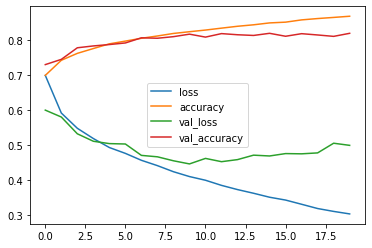

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

33/33 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.8144


[0.5060309171676636, 0.814393937587738]

## Creating the model with dropouts (Good model with lower loss)
Accuracy 80% 

In [ ]:
dropout_model = keras.Sequential([
    tf.keras.Input(shape=(7,)),
    tf.keras.layers.Dense(249, name="units1", activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(473, name="units2", activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(473, name="units3", activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation="softmax"),

])

In [ ]:
dropout_model.layers

In [ ]:
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 units1 (Dense)              (None, 249)               1992      
                                                                 
 dropout (Dropout)           (None, 249)               0         
                                                                 
 units2 (Dense)              (None, 473)               118250    
                                                                 
 dropout_1 (Dropout)         (None, 473)               0         
                                                                 
 units3 (Dense)              (None, 473)               224202    
                                                                 
 dropout_2 (Dropout)         (None, 473)               0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [ ]:
dropout_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [ ]:
VALIDATION_SET = (X_valid, y_valid)

history = dropout_model.fit(X_train, y_train,epochs=20,
                        validation_data=VALIDATION_SET,
                        batch_size=32,
                        callbacks=[early_stopping_cb])

Epoch 1/20
990/990 [==============================] - 12s 12ms/step - loss: 0.7461 - accuracy: 0.6833 - val_loss: 0.6227 - val_accuracy: 0.7148
Epoch 2/20
990/990 [==============================] - 13s 14ms/step - loss: 0.6411 - accuracy: 0.7192 - val_loss: 0.5744 - val_accuracy: 0.7489
Epoch 3/20
990/990 [==============================] - 12s 12ms/step - loss: 0.6004 - accuracy: 0.7376 - val_loss: 0.5499 - val_accuracy: 0.7560
Epoch 4/20
990/990 [==============================] - 12s 12ms/step - loss: 0.5749 - accuracy: 0.7501 - val_loss: 0.5259 - val_accuracy: 0.7702
Epoch 5/20
990/990 [==============================] - 13s 13ms/step - loss: 0.5575 - accuracy: 0.7533 - val_loss: 0.5118 - val_accuracy: 0.7742
Epoch 6/20
990/990 [==============================] - 12s 12ms/step - loss: 0.5420 - accuracy: 0.7644 - val_loss: 0.5096 - val_accuracy: 0.7749
Epoch 7/20
990/990 [==============================] - 12s 12ms/step - loss: 0.5279 - accuracy: 0.7702 - val_loss: 0.4927 - val_accuracy:

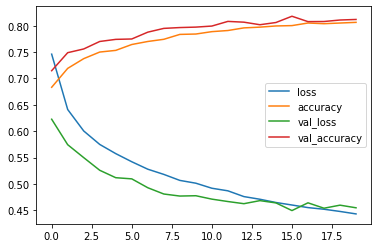

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
dropout_model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.8011


[0.4845033586025238, 0.8011363744735718]

## Train the model (Not so good model)
Accuracy 70% with more error

In [ ]:
model_clf = tf.keras.Sequential()

# model_clf.add(tf.keras.Input(shape=(7,)))
model_clf.add(tf.keras.layers.Dense(7,input_shape=(7,),activation='relu'))

model_clf.add(tf.keras.layers.Dense(10, activation="relu"))
model_clf.add(tf.keras.layers.Dense(8, activation="relu"))
model_clf.add(tf.keras.layers.Dense(8, activation="relu"))
model_clf.add(tf.keras.layers.Dense(7, activation="softmax"))


# model_clf.compile(optimizer="SGD",
#                   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                   metrics=["accuracy"])

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 7)                 63        
                                                                 
Total params: 359
Trainable params: 359
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_clf.compile(optimizer="SGD",
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])

In [ ]:
(model_clf.layers[0].get_weights())

[array([[ 0.2617401 , -0.18957031, -0.3314204 , -0.24056077,  0.42348886,
         -0.62415266,  0.16377127],
        [-0.35992137, -0.4835767 ,  0.49646032, -0.42458254,  0.25863785,
         -0.40608454, -0.57047343],
        [ 0.05682617,  0.26062036,  0.54200625, -0.5779332 ,  0.19303888,
          0.63580465, -0.5062258 ],
        [ 0.10158229, -0.15329397, -0.1933631 , -0.47910184, -0.60331875,
         -0.21115828,  0.2567733 ],
        [ 0.22960818, -0.02277714, -0.45848876, -0.26345667,  0.42865956,
          0.1594845 ,  0.451468  ],
        [-0.06651747,  0.63014543,  0.06766027,  0.13428468, -0.08359247,
         -0.07413733, -0.15192872],
        [-0.5542507 ,  0.33564848,  0.16789138,  0.3976742 ,  0.2196213 ,
         -0.13435769,  0.10865825]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

#### Early Stopping

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)

In [ ]:
import time
start_time = time.time()
EPOCHS = 100
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train,epochs=EPOCHS,
                        validation_data=VALIDATION_SET,
                        batch_size=32,
                        callbacks=[early_stopping_cb])
end_time = time.time()
duration = f"duration:{end_time - start_time}s"
print(duration)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1584/1584 [==============================] - 4s 2ms/step - loss: 1.4806 - accuracy: 0.3765 - val_loss: 1.2439 - val_accuracy: 0.4883
Epoch 2/100
1584/1584 [==============================] - 3s 2ms/step - loss: 1.1209 - accuracy: 0.5190 - val_loss: 1.0607 - val_accuracy: 0.5372
Epoch 3/100
1584/1584 [==============================] - 3s 2ms/step - loss: 1.0252 - accuracy: 0.5467 - val_loss: 0.9842 - val_accuracy: 0.5783
Epoch 4/100
1584/1584 [==============================] - 3s 2ms/step - loss: 0.9586 - accuracy: 0.5932 - val_loss: 0.9144 - val_accuracy: 0.6202
Epoch 5/100
1584/1584 [==============================] - 3s 2ms/step - loss: 0.8927 - accuracy: 0.6260 - val_loss: 0.8419 - val_accuracy: 0.6492
Epoch 6/100
1584/1584 [==============================] - 3s 2ms/step - loss: 0.8255 - accuracy: 0.6477 - val_loss: 0.7784 - val_accuracy: 0.6706
Epoch 7/100
1584/1584 [==============================] - 3s 2ms/step - loss: 0.7755 - accuracy: 0.6665 - val_loss: 0.7426 - val_accuracy: 0.68

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.480564,0.376495,1.243879,0.488321
1,1.120860,0.519019,1.060688,0.537247
2,1.025219,0.546734,0.984230,0.578283
3,0.958575,0.593201,0.914435,0.620160
4,0.892678,0.625967,0.841871,0.649200
...,...,...,...,...
81,0.640971,0.722908,0.645916,0.722327
82,0.640904,0.722687,0.640476,0.722327
83,0.640745,0.722150,0.633069,0.723064
84,0.639366,0.722119,0.644829,0.723169


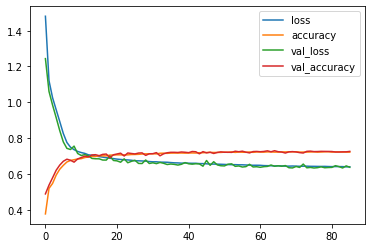

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

33/33 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.7055


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.6754676699638367, 0.7054924368858337]

## delete the code above till train the model. Just trying to see the accuracy of the model without tuning